# Lab 4 - Assessment
### Jackson Rolando

## The purpose: 
1. Which (if any) morphological and biogeochemical traits distinguish between originating species 
of the scat samples? 
 
2. Why do you think those traits differ across species?

### Notes on *Reid, 2015*

- Only three main differences found: diameter, mass, and C:N ratio
- bobcats and coyotes scratch the ground, leave scent marks
    - coyotes: scratch adjacent to urine
    - bobcats: more controlled scratches, deposit at one end
- C:N - Carbon to Nitrogen ratio
    - plant-eaters: high
    - meat-eaters: low
    - precision was 0.2
- Analysis:
    - one-way ANOVA: differences in means
    - log transformation necessary 
- Some irregular scats coded as flat and lacking some/all measurements
- gray foxes had weird stuff going on
- 19 samples missing one or more features
- Results:
    - Diameter - coyote vs others
    - Mass - gray fox vs others
    - C:N - all groups
    - best form traits:
        - number of pieces
        - diameter
        - taper length
        - log mass
        - C:N ratio - <u>distinct for all three species</u>
    - scrape doesn't help a TON, for this data, really just for Bobcats

### Notes on animals:
#### [Coyotes](https://en.wikipedia.org/wiki/Coyote)
- M: 8 to 20 kg, F: 7 to 18 kg
- shares ancestor with NA grey wolves
- mark territory with raised-leg urination and ground-scratching
- mainly animals, sometimes plants
- may eat bobcats
- feeding territories of 0.4 to 62 $km^2$
- commonly livestock predators

#### [Gray Foxes](https://en.wikipedia.org/wiki/Gray_fox)
- 3.6 to 7 kg
- omnivorous - in NA, insectivorous and herbivorous - fruit
- hunt for same things as bobcats and coyotes
    - gives space to coyote
    - sometimes killed by coyotes and bobcats - result of competition, not usually eaten
- usually stay close to the den
- to escape coyotes, often near humans

#### [Bobcats](https://en.wikipedia.org/wiki/Bobcat)
- M: 6.4–18.3 kg, F: 4–15.3 kg
- carnivorous
    - sometimes larger animals to return to to feed on
    - usually hare
    - number of hare correlates with number of bobcats
- could have home ranges, moving 3 to 11 km along a habitual route, some of them are transient, some stay very close to a den
- sometimes go after livestock or pets

### Notes on [How Biologists Estimate Populations of Animals](https://adfg.alaska.gov/index.cfm?adfg=wildlifenews.view_article&articles_id=814#:~:text=Another%20efficient%20method%20researchers%20have,them%20to%20estimate%20the%20entire):
- census
- capture, mark recapture
- aerial

### Notes on [Estimating Bobcat Population Sizes](https://academic.oup.com/jmammal/article/90/1/129/847663)
- uses tests to determine population based on how many repeat individuals' scat was sampled
- male bobcats' home range: ~3.21 $km^2$

## I. Introduction

Coyotes, Gray Foxes, and Bobcats are three medium-large-sized mamalian species which inhabit the coastal regions of California in question. Coyotes are omnivorous, suplementing their meat-heavy diet with occasional fruit. Gray foxes mostly eat small animals, insects, and fruit. Bobcats are carnivorous, most often praying on hares.

Coyotes are the largest of the three species at 7 to 20 kg, bobcats come in second at 4-18 kg, gray foxes are the smallest of the three at 3.6 to 7 kg. Coyotes and bobcats sometimes kill gray foxes that come into their territory, not eating them necessarily, just out of intimidation and protection of their own turf. Coyotes and bobcats are quite territorial, often marking their territory boundries with scratches around where they poop.  

These three species interact with humans infrequently, though they do come around. The gray fox, in order to avoid coyote or bobcat territory, tend to live closer to humans, unlike the others which tend to stay away. On occasion, coyotes and bobcats pray on livestock, sometimes even house pets.

Though none of these species are endangered, humans are directly competing with these species for space, and as stated they sometimes interact with the humans implanted in their habitat, so it makes sense to keep track of populations in specified areas. There are many ways to measure populations, like direct observation and aerial photos, though since these species aren't easy to spot against the landscape and are usually quite good at avoiding humans, this can prove difficult. Another method of population estimation is through capture, tag, recapture. This can also prove quite difficult, as it requires that we actually track down these animals, catch them, then add the stress of tagging them in some way. This is time, consuming, involved, dangerous, and can even result in the animals changing their behavior. So, a less-invasive method of population estimation is being explored. Enter, scat. 

Collecting scat samples requires no contact with the animals themselves, but can be used similarly to capture, tag, recapture to estimate population, as DNA can be used to identify specific individuals. So, if we can find a way to determine which species a sample belongs to, we can estimate the populations without every needing to disturb the wildlife. 

We're setting out to find if there are morphological or chemical properties of the scat of these three species that can be used to tell them apart, in order to noninvasively estimate their separate populations. 

## II. Analysis

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

We'll load the data:

In [220]:
df = pd.read_csv("Dataset_BobcatsCoyotesFoxes.csv");
df.head()

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    110 non-null    object 
 1   Month      110 non-null    object 
 2   Year       110 non-null    int64  
 3   Site       110 non-null    object 
 4   Location   110 non-null    object 
 5   Age        110 non-null    int64  
 6   Number     110 non-null    int64  
 7   Length     110 non-null    float64
 8   Diameter   104 non-null    float64
 9   Taper      93 non-null     float64
 10  TI         93 non-null     float64
 11  Mass       109 non-null    float64
 12  d13C       108 non-null    float64
 13  d15N       108 non-null    float64
 14  CN         108 non-null    float64
 15  Ropey      110 non-null    int64  
 16  Segmented  110 non-null    int64  
 17  Flat       110 non-null    int64  
 18  Scrape     110 non-null    int64  
dtypes: float64(8), int64(7), object(4)
memory usage: 1

We'll convert the appropriate features to categorical:

In [222]:
cat_cols = ["Species", "Month", "Year", "Site", "Location", "Age", "Number", "Ropey", "Segmented", "Flat", "Scrape"]
for col in cat_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Species    110 non-null    category
 1   Month      110 non-null    category
 2   Year       110 non-null    category
 3   Site       110 non-null    category
 4   Location   110 non-null    category
 5   Age        110 non-null    category
 6   Number     110 non-null    category
 7   Length     110 non-null    float64 
 8   Diameter   104 non-null    float64 
 9   Taper      93 non-null     float64 
 10  TI         93 non-null     float64 
 11  Mass       109 non-null    float64 
 12  d13C       108 non-null    float64 
 13  d15N       108 non-null    float64 
 14  CN         108 non-null    float64 
 15  Ropey      110 non-null    category
 16  Segmented  110 non-null    category
 17  Flat       110 non-null    category
 18  Scrape     110 non-null    category
dtypes: category(11), float64(8)
m

Now we'll look at distributions of the continuous variables, with their means:

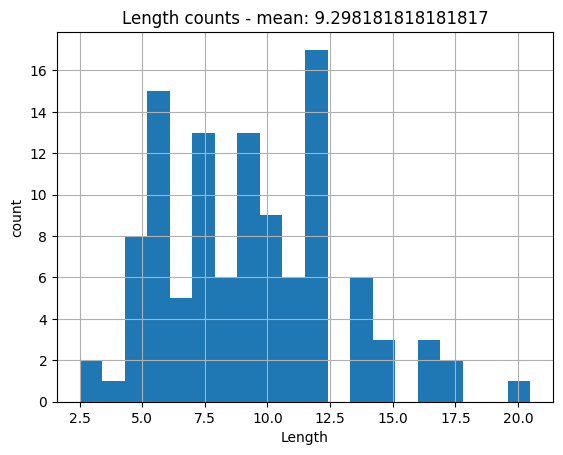

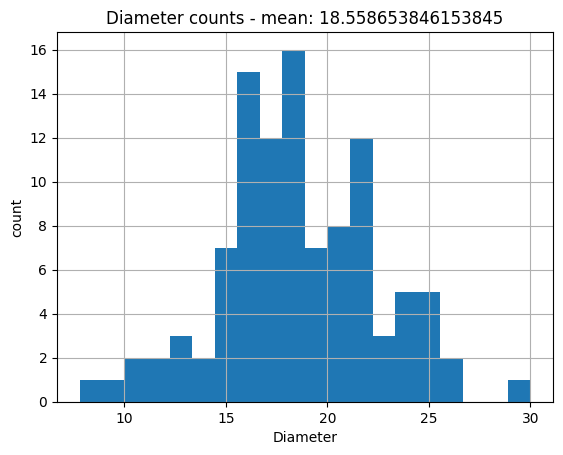

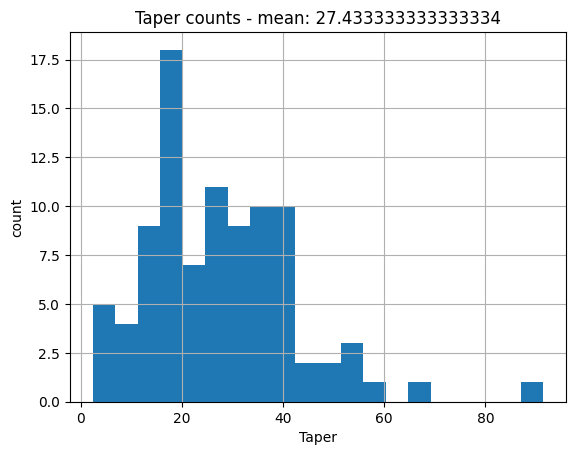

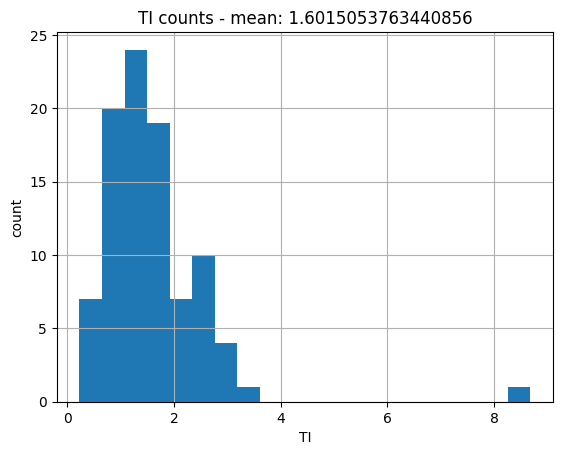

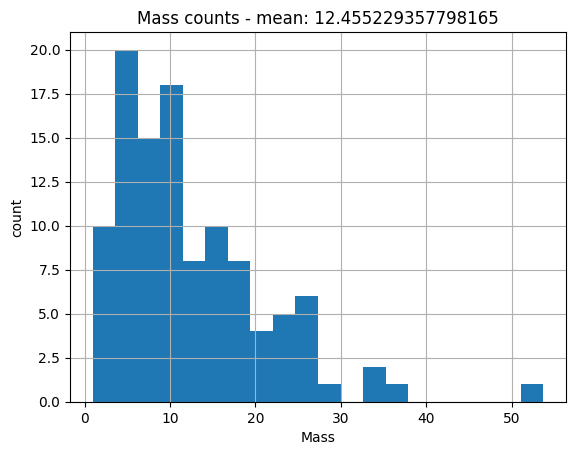

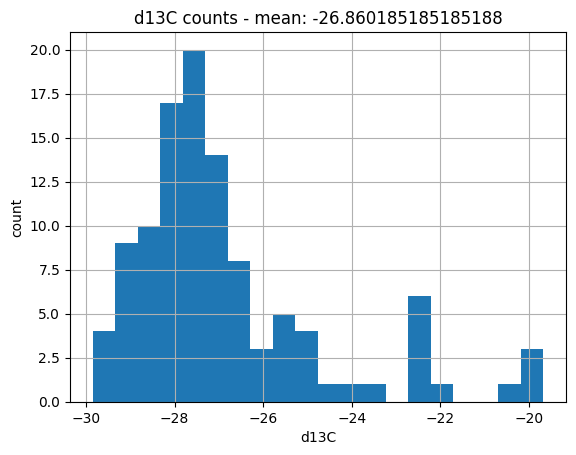

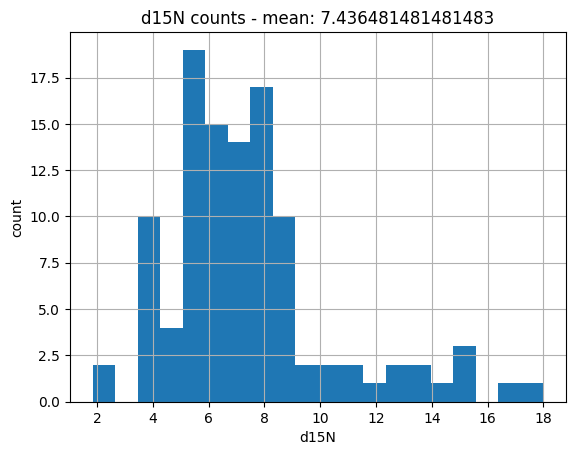

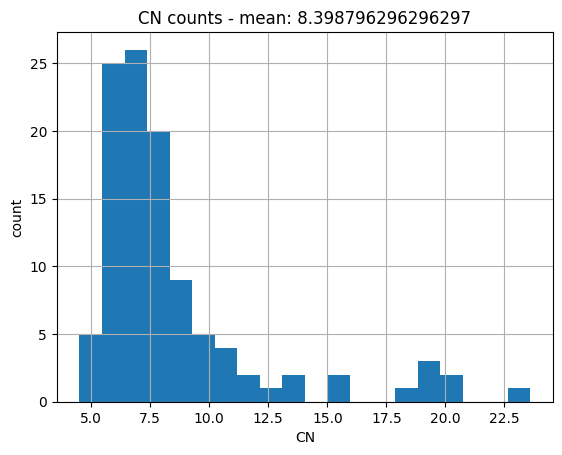

In [223]:
cont_cols = ["Length", "Diameter", "Taper", "TI", "Mass", "d13C", "d15N", "CN"]
for col in cont_cols:
    ax = df[col].hist(bins=20)
    ax.set_title(col + " counts - mean: " + str(df[df[col].notna()][col].mean()))
    ax.set_xlabel(col)
    ax.set_ylabel("count")
    plt.show()

At first glance, there seem to be outliers in the data. Taper has only a few points above 80, significantly separated from the rest of the data. TI does as well, though with values above 8. Mass also seems to have some isolated points greater than 50. For the d13C, d15N, and CN results, the distribution seems very skewed to the right. Let's get their z-scores (not including missing values) and look at the outliers, using a z-score of $\pm3$:

In [224]:
for col in cont_cols:
    df_vals = df[df[col].notna()]
    print(col + ":\n" + str(df_vals[np.abs(stats.zscore(df_vals[col])) > 3]) + "\n")

Length:
  Species    Month  Year  Site Location Age Number  Length  Diameter  Taper  \
9  Bobcat  January  2012  ANNU   Middle   5      1    20.5      18.0   21.4   

     TI   Mass   d13C  d15N   CN Ropey Segmented Flat Scrape  
9  1.19  11.22 -27.35  6.06  7.7     1         1    0      0  

Diameter:
Empty DataFrame
Columns: [Species, Month, Year, Site, Location, Age, Number, Length, Diameter, Taper, TI, Mass, d13C, d15N, CN, Ropey, Segmented, Flat, Scrape]
Index: []

Taper:
   Species     Month  Year  Site Location Age Number  Length  Diameter  Taper  \
99  Coyote  November  2011  ANNU  OffEdge   1      4     6.5      24.0   91.5   

      TI  Mass   d13C   d15N   CN Ropey Segmented Flat Scrape  
99  0.81  53.7 -23.84  12.59  7.0     0         1    0      0  

TI:
    Species      Month  Year  Site Location Age Number  Length  Diameter  \
76  GrayFox  September  2011  ANNU   Middle   4      2     7.5       7.8   

    Taper    TI  Mass   d13C  d15N   CN Ropey Segmented Flat Scrape  

In [225]:
coyote_mass_mean = (df[df["Species"] == "Coyote"]["Mass"].sum() - df.iloc[99]["Mass"]) / (df["Species"] == "Coyote").sum()
print(coyote_mass_mean)

df[df["Species"] == "Coyote"][np.abs(stats.zscore(df[df["Species"] == "Coyote"]["Mass"])) > 3]

16.327499999999997


,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
99,Coyote,November,2011,ANNU,OffEdge,1,4,6.5,24.0,91.5,0.81,53.7,-23.84,12.59,7.0,0,1,0,0


For length, there is one row with an outlier, belonging to a bobcat. This sample had a length of 20.5, but it has a greater-than-average mass, so we'll leave it. 

Taper had a single outlier, but looking at the TI value (which is well within the normal range), it looks like this may have been an error when entering, since the ratio of Taper to Diameter should yield the TI value. In this case, the TI of 0.81 times the Diameter of 24 gives a Taper of 19.44, which leads one to belive that the person who entered this value may have switched the 1 and the 9, so we'll change the Taper value to 19.5 (assuming the decimal was correct, and the discrepancy with my calculated value is from rounding in the initial generation of the data set). 

There's one outlier for TI, a grey fox sample. Its value makes sense for the Taper and Diameter values, and its taper length doesn't exceed the sample's length, so we'll leave it.

There's one large outlier for mass, with a value of 53.7 grams. It comes from a coyote, the largest animal of the three, but is still huge, as the coyote's samples' mean mass is 18.245. Checking the z-score of this sample against only other coyote samples, it still has a z-score of above 3, so we'll set it to the average coyote sample mass, without this sample included in the calculation.

For d13C levels, 

In [226]:
df.loc[99, "Taper"] = 19.5
df.loc[99, "Mass"] = coyote_mass_mean

,Species,Taper
0,Coyote,41.9
1,Coyote,37.1
2,Bobcat,16.5
3,Coyote,24.7
4,Coyote,20.1
...,...,...
105,GrayFox,38.9
106,Bobcat,26.2
107,Bobcat,9.1
108,Coyote,36.9


### Now, we'll look at missing values in the data:

In [227]:
for col in df:
    if(df[col].isna().sum() > 0):
        print("\n" + col + ": \n" + str(df[df[col].isna()]))


Diameter: 
    Species     Month  Year  Site Location Age Number  Length  Diameter  \
10  GrayFox   January  2012  ANNU   Middle   3      1     8.0       NaN   
12  GrayFox   January  2012  ANNU   Middle   3      1    12.0       NaN   
13  GrayFox   January  2012  ANNU   Middle   3      1    11.5       NaN   
14  GrayFox   January  2012  ANNU   Middle   1      1     8.5       NaN   
28  GrayFox     April  2012  ANNU   Middle   1      1    10.0       NaN   
94   Coyote  November  2011  ANNU  OffEdge   3      1     4.5       NaN   

    Taper  TI   Mass   d13C   d15N    CN Ropey Segmented Flat Scrape  
10    NaN NaN   2.51 -25.79   7.83  20.5     0         0    1      0  
12    NaN NaN  18.14 -25.18  10.10  15.5     0         0    1      0  
13    NaN NaN   8.17 -25.73   9.72  18.9     0         0    1      0  
14    NaN NaN   3.43 -26.17   8.07  19.9     0         0    1      0  
28    NaN NaN   5.53 -26.58   8.17  18.9     0         0    1      0  
94    NaN NaN  20.29 -22.69  13.32  

The missing values for diameter are just for those that are categorized as flat. We'll zero these out. The missing values for taper and TI are of the same rows and are categorized as a few different types. For the flat ones, we'll zero them out. For ropey and segmented, I'll set these to the average taper/TI value. For mass, d13C, d15N, and CN, there aren't very many missing values, so we'll set them to the average value:

In [228]:
species_names = ["Coyote", "Bobcat", "GrayFox"]

means = {}
for col in ["Taper", "TI", "d13C", "d15N", "CN", "Mass"]:
    means[col] = {}
    df_notna = df[df[col].notna()][["Species", col]]
    for spec in species_names:
        means[col][spec] = df_notna[df_notna["Species"] == spec][col].mean()

def fill_taper(row):
    ret_row = row.copy()
    if np.isnan(row[0]) and np.isnan(row[1]):
        if(row[3] == 0 and row[4] == 0 and row[2] != 0):
            ret_row[0] = 0
            ret_row[1] = 0
        else:
            ret_row[0] = means["Taper"][row[5]]
            ret_row[1] = means["TI"][row[5]]
    return ret_row

df[["Taper", "TI", "Flat", "Segmented", "Ropey", "Species"]] = df[["Taper", "TI", "Flat", "Segmented", "Ropey", "Species"]].apply(fill_taper, axis=1)

df["Diameter"] = df["Diameter"].fillna(0)

def fill_mean(row):
    ret_row = row.copy()
    if(np.isnan(row[1])):
        ret_row[1] = means[col][row[0]]
    return ret_row

for col in ["d13C", "d15N", "CN", "Mass"]:
    df[["Species", col]] = df[["Species", col]].apply(fill_mean, axis=1)

In [229]:
num_cols_with_na = 0
for col in df:
    if(df[col].isna().sum() > 0):
        num_cols_with_na += 1

if(num_cols_with_na > 0): print(str(num_cols_with_na) + "cols with na")
else: print("fill success")

fill success
